In [3]:
import requests
import json 
import random
import time
import os
import math
from bs4 import BeautifulSoup
from selenium import webdriver
from PIL import Image  
import PIL
import statistics
import re
import urllib
from selenium.webdriver.firefox.options import Options

In [21]:
firefox_profile = webdriver.FirefoxProfile()
browser = webdriver.Firefox(firefox_profile = firefox_profile, options = options)
browser.get("https://www.wikiaves.com.br/midias.php?tm=s&t=s&s=11291")
html = browser.page_source
soup = BeautifulSoup(html, "html.parser")

In [22]:
sounds = soup.find_all(class_ = 'mejs-container svg wikiaves-player progression-single progression-skin progression-minimal-dark progression-audio-player mejs-audio')


In [24]:
sounds

[<div class="mejs-container svg wikiaves-player progression-single progression-skin progression-minimal-dark progression-audio-player mejs-audio" id="mep_0" style="width: 309.7px; height: 30px;"><div class="mejs-inner"><div class="mejs-mediaelement"><audio class="mejs-container svg wikiaves-player progression-single progression-skin progression-minimal-dark progression-audio-player mejs-audio" id="wa-player-727795" preload="none" src="https://s3.amazonaws.com/media.wikiaves.com.br/recordings/727/727795_b664b037610f3ead0f904bd8033ccdf4.mp3" style="width: 100%; height: 100%;"> <source src="https://s3.amazonaws.com/media.wikiaves.com.br/recordings/727/727795_b664b037610f3ead0f904bd8033ccdf4.mp3" type="audio/mp3"/></audio></div><div class="mejs-layers"><div class="mejs-poster mejs-layer" style="display: none; width: 100%; height: 100%;"></div></div><div class="mejs-controls"><div class="mejs-button mejs-playpause-button mejs-play"><button aria-controls="mep_0" aria-label="Play/Pause" title

In [6]:
links_fotos = []
num_fotos = []
links_sons = []
num_sons = []
lista_especies = []
for especie in soup.find_all(class_ = "font-blue"):
    if especie.get('href') is not None and ("https://www.wikiaves.com.br/" + especie.get('href'))[42] != "s":
        links_fotos.append("https://www.wikiaves.com.br/" + especie.get('href'))
        num_fotos.append(especie.text)
for especie in soup.find_all(class_="font-green-dark"):
    if especie.text not in lista_especies:
        lista_especies.append(especie.text)
    

In [135]:
for especie in lista_especies:
    os.mkdir('/home/aninha/Documents/Birds_Project/images/{}'.format(especie))

In [7]:
for link in range(len(links_fotos)):
    print(link, "link")
    browser.get(links_fotos[link])
    i = 0
    for k in range(1000000):
        if k % 10 == 0:
            html = browser.page_source
            soup = BeautifulSoup(html, 'html.parser')
            imagens = soup.find_all(class_="img-responsive")
            del html
            del soup
        if len(imagens) >= int(num_fotos[link]):
            break
        if k % 100 == 0:
            print(k)
        browser.execute_script("window.scrollTo(0, {})".format(2000 + i))
        i += 2000
    html = browser.page_source
    soup = BeautifulSoup(html, 'html.parser')
    imagens = soup.find_all(class_="img-responsive")
    for imagem in range(len(imagens)):
        salvar = imagens[imagem]['src']
        especie = lista_especies[link]
        my_filename = os.path.join("/home/aninha/Documents/Birds_Project/images/{}/".format(especie), "{}{}.jpg".format(especie, imagem))
        with open(my_filename, "w") as handle:
            print("Hello world!", file=handle)
        urllib.request.urlretrieve(salvar, "/home/aninha/Documents/Birds_Project/images/{}/".format(especie) + '{}{}.jpg'.format(especie, imagem))
    del html
    del soup
    del imagens

0 link
0
100
200
300
400
500
600
700
800
900
1000


KeyboardInterrupt: 

<html class="wf-poppins-n3-active wf-poppins-n4-active wf-poppins-n5-active wf-poppins-n6-active wf-poppins-n7-active wf-worksans-n3-active wf-worksans-n4-active wf-worksans-n5-active wf-worksans-n6-active wf-worksans-n7-active wf-active" lang="pt-BR" xml:lang="pt-BR"><head><script id="google_shimpl" src="https://pagead2.googlesyndication.com/pagead/js/r20200129/r20190131/show_ads_impl_fy2019.js"></script><script src="https://m.addthis.com/live/red_lojson/300lo.json?si=5e371acb32a7bc00&amp;bkl=0&amp;bl=1&amp;pdt=2345&amp;sid=5e371acb32a7bc00&amp;pub=ra-5ad4092b70bd4d3c&amp;rev=v8.28.3-wp&amp;ln=pt&amp;pc=men&amp;cb=0&amp;ab=-&amp;dp=www.wikiaves.com.br&amp;fp=midias.php%3Ftm%3Df%26t%3Ds%26s%3D10016&amp;fr=&amp;of=2&amp;pd=0&amp;irt=1&amp;vcl=1&amp;md=0&amp;ct=1&amp;tct=0&amp;abt=0&amp;cdn=0&amp;pi=1&amp;rb=0&amp;gen=100&amp;chr=UTF-8&amp;colc=1580669643270&amp;jsl=33&amp;uvs=5e37138c7d15c57c00f&amp;skipb=1&amp;callback=addthis.cbs.jsonp__26328033219520730" type="text/javascript"></scri
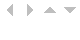

In [57]:
soup = BeautifulSoup(html, 'html.parser')
i = 0
print(soup)
for image in soup.find_all(class_ = "img-responsive"):
    i +=1
    print(image)
    salvar = image.get('scr')
    im1 = Image.open(r"/home/aninha/Documents/Birds_Project/images/ema{}.jpg".format(i))
    im1 = im1.save("ema{}.jgp".format(i))


In [2]:
cat /proc/meminfo

MemTotal:       16292036 kB
MemFree:         4177556 kB
MemAvailable:   11818392 kB
Buffers:          424428 kB
Cached:          7765624 kB
SwapCached:        22188 kB
Active:          4299900 kB
Inactive:        6737420 kB
Active(anon):    3014864 kB
Inactive(anon):   497492 kB
Active(file):    1285036 kB
Inactive(file):  6239928 kB
Unevictable:      250276 kB
Mlocked:              16 kB
SwapTotal:      15625212 kB
SwapFree:       15601648 kB
Dirty:              3032 kB
Writeback:             0 kB
AnonPages:       3075336 kB
Mapped:          1106220 kB
Shmem:            667080 kB
KReclaimable:     458032 kB
Slab:             618724 kB
SReclaimable:     458032 kB
SUnreclaim:       160692 kB
KernelStack:       20944 kB
PageTables:        68792 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:    23771228 kB
Committed_AS:   10839420 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       44020 kB
VmallocChunk:          0 kB
Percpu:          